In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
import ClassCOMPAS     as CC ###
# import ClassFormationChannels as FC 

# for color map
import seaborn as sns

# import script that has formation channel classification functions:
from PostProcessingScripts import * 
# from ClassFormationChannels_5mainchannels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
def plotmetallicitydistribution(axe, xvar, nrbins, ZofInterest, xvarrange, xlabel, ylabel, xlim, ylim, indplot):
    """ plot distribution of xvar for array of metallicities 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
    you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
    
    """    
    
    ymax = 0
#     groups  = dictChannelsBBHList  
    ZlabelIndex = [r'\approx Z_{\odot} / 50', r'\approx Z_{\odot} / 10',r'\approx Z_{\odot} / 5',\
                   r'\approx Z_{\odot} / 2', r'\approx Z_{\odot} ']
    
    # set kde  range of parameter
    # xx_boot is the x points for which we will use a kde to calculate the y-value of the distribution
    resKDE =250#100#0 # just nr of interpolation points for kde function (this is not the bandwith)
    # if xvarrange is specified use that, otherwise base it on xvar range
    if xvarrange:
        xx_boot = np.linspace(xvarrange[0], xvarrange[1], resKDE)
    else:
        xx_boot = np.linspace(min(xvar)*0.8,max(xvar)*1.2, resKDE)
    
   
    # I want to plot a kde for each metallcity in ZofInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        # only plot the label if indplot=0
        if indplot==0:
            LABEL = r'$Z_{\rm{i}} = %s$'%ZlabelIndex[nrZ]
        else:
            LABEL = None 
            
            
        ind        = np.where(Data.metallicityGrid == Z)[0]
        # Corresponding Mass Evolved per metallicity simulation
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z

        m = xvar[boolZ]
        w     = Data.weight[boolZ]

        
        KDE = gaussian_kde(m, weights=w, bw_method = nrbins)
        # y value of the kde distribution
        y_boot = KDE(xx_boot) * np.sum(w) / MsunEvolved # normalize to total weight to real rate

        
        axe.plot(xx_boot, (y_boot)*1E6, c=mycolors[nrZ], linewidth=5, label=LABEL)
        
        ymax = max(np.concatenate(([ymax], y_boot*1E6)))
    ###########

    
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ymax*1.05)

    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs)

    
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
    
    
    return handles, labels

###################




    

In [3]:
# Load Fiducial model data 
OPTIMISTIC = False
DCOtype='BHNS'
pathCOMPASOutput= '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5'
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

weighted samples :-D
Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()


bandwidth kde = 0.04


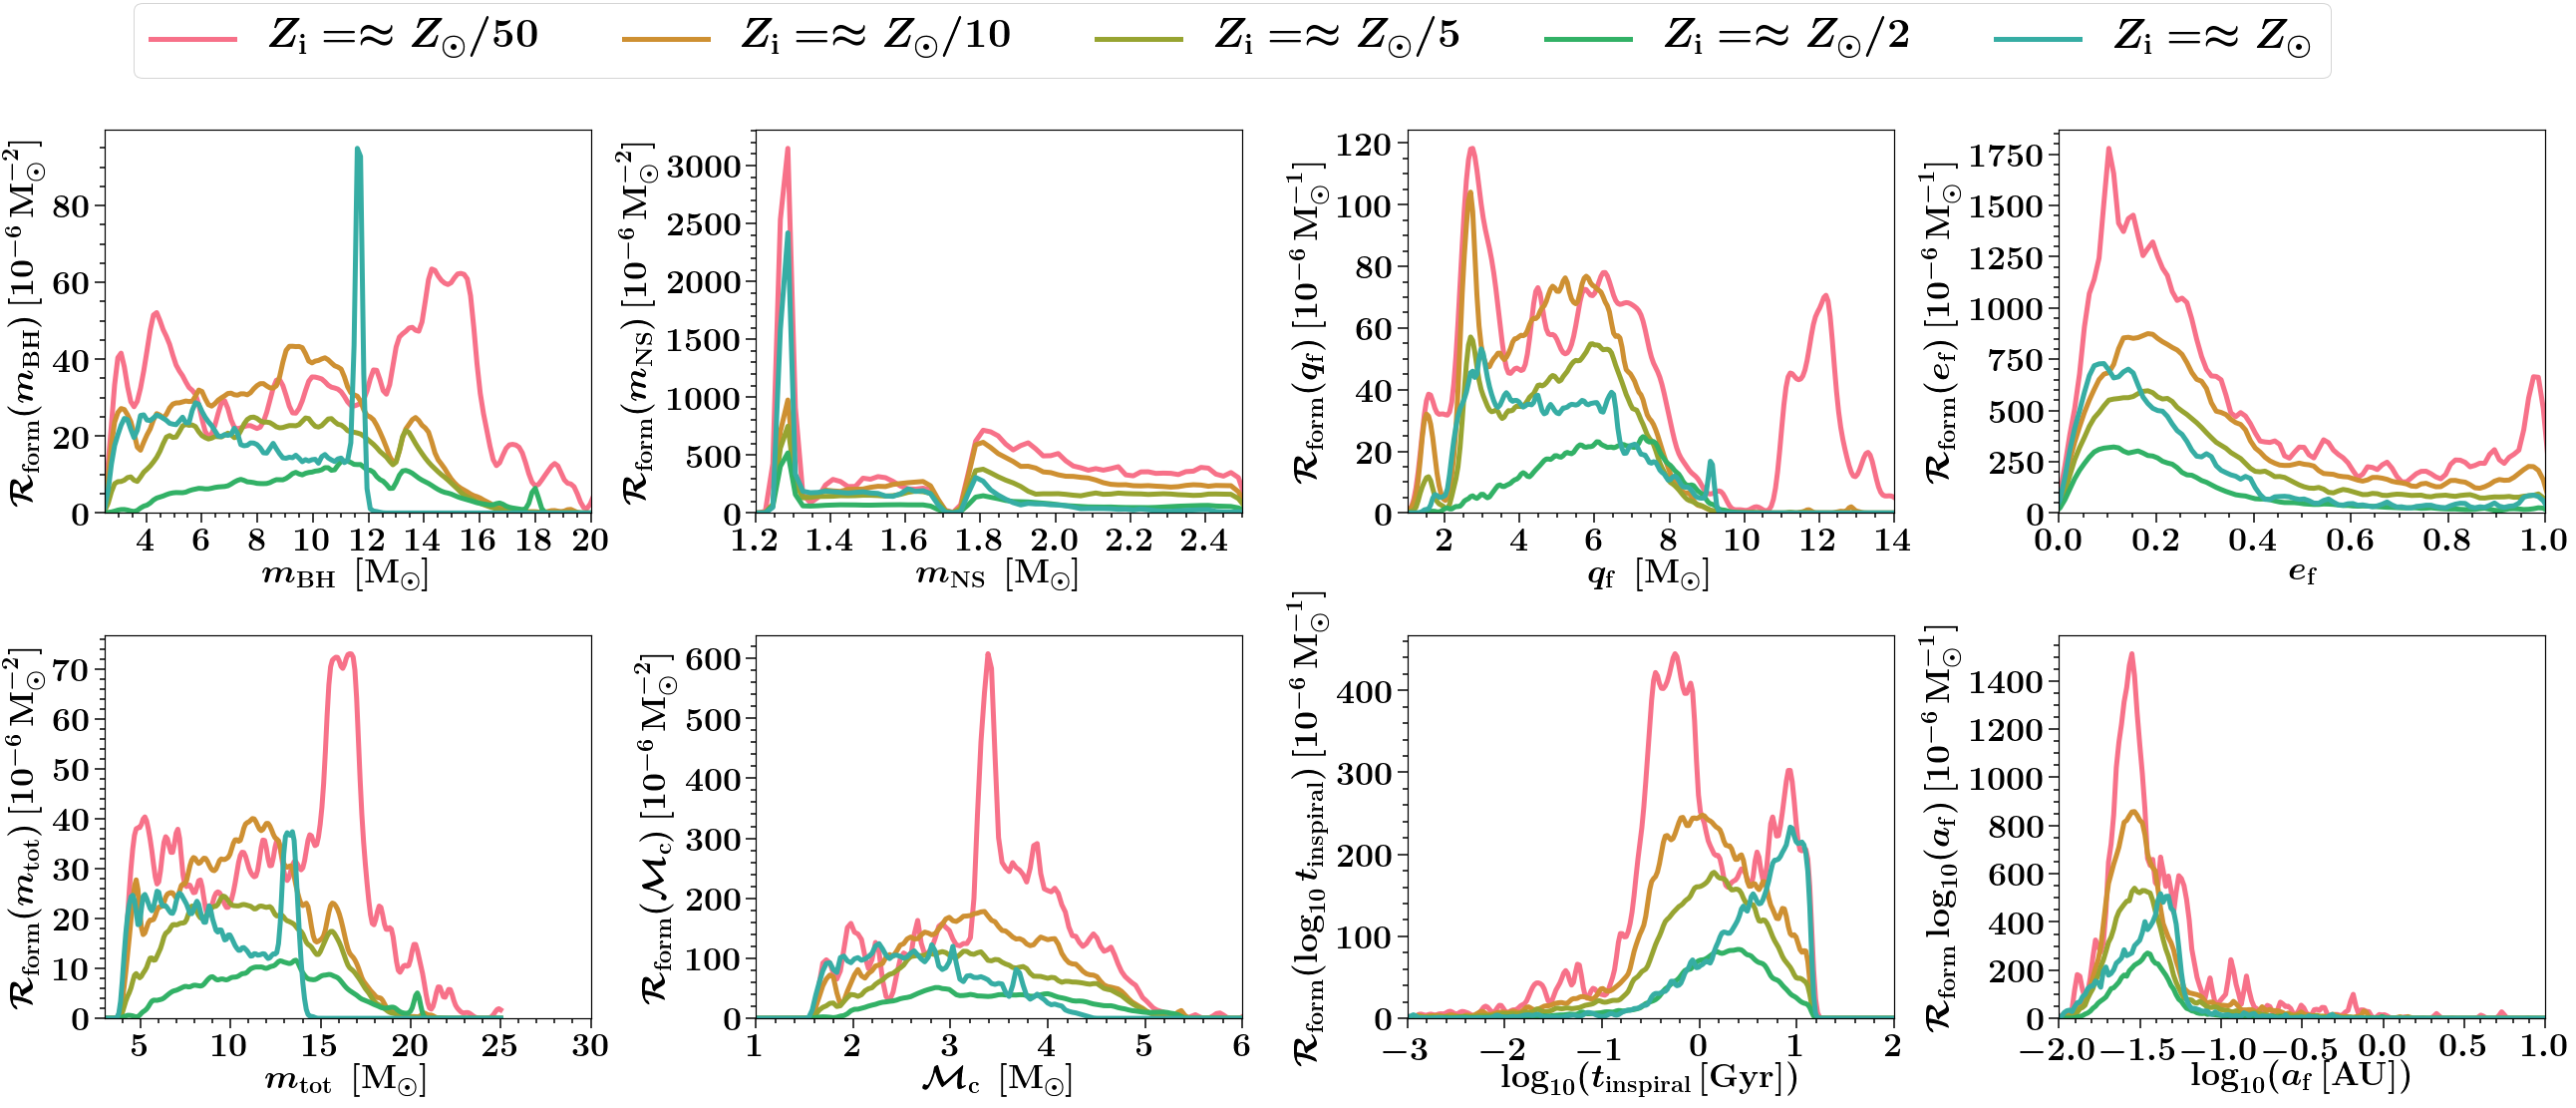

In [4]:





f, ax= plt.subplots(ncols=4,nrows=2,figsize=(36,14), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5,1.5], "height_ratios":[2,2]})

fs=34 # fontsize 


# settings 
# subset of metallicity grid points that we want to show:
ZOfInterest = np.asarray([0.00027, 0.0014, 0.00272, 0.00732, 0.01416 ])
Nbins=0.04
print('bandwidth kde =', Nbins)
linewidth=3.5
mycolors       = sns.color_palette("husl", 8)


# obtain BH and NS mass 
M1, M2 = Data.mass1, Data.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
del M1
del M2



####### BH MASS
xvar = MBH
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{BH}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
handles, labels=plotmetallicitydistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, \
                                            ZofInterest=ZOfInterest,  xvarrange=[1,30],\
                                            xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,20], ylim=[0,1.5], indplot=0) 



####### NS MASS 
xvar = MNS
nameY = r'$\mathcal{R}_{\rm{form}}(m_{\rm{NS}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,5],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1.2,2.5], ylim=[0,31], indplot=1) 




####### mass ratio
xvar = MBH/MNS
nameY = r'$\mathcal{R}_{\rm{form}}(q_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $q_{\rm{f}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[1,15],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[1,14], ylim=[0,4], indplot=2) 




####### mass total
xvar = MBH+MNS
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{tot}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,0], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,25],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[3,30], ylim=[0,1.5], indplot=4) 



####### CHIRP MASS
xvar = chirpmass(MBH, MNS)
nameY = r'$ \mathcal{R}_{\rm{form}}(\mathcal{M}_{\rm{c}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,1], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,10],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6], ylim=[0,7.5], indplot=5) 





# ######## INSPIRAL TIME
xvar = np.log10(Data.tc / 1000)
# nameY = r'$ \rm{d}N /(\rm{d}M_{\rm{SFR}} \rm{d}t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameY = r'$\mathcal{R}_{\rm{form}}(\log_{10}t_{\rm{inspiral}} )\, [10^{-6}\, \rm{M}_{\odot}^{-1} ]  $'
nameX = r' $\log_{10}(t_{\rm{inspiral}} \,  [\rm{Gyr}])$'

_,_=plotmetallicitydistribution(axe=ax[1,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-3,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-3,2], ylim=[0,3.6], indplot=5) 



# ######## INSPIRAL TIME
xvar = Data.eccentricityDCOFormation 
nameY = r'$ \mathcal{R}_{\rm{form}}(e_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $e_{\rm{f}}$ $ \, $'

_,_=plotmetallicitydistribution(axe=ax[0,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-0.5,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[0,1], ylim=[0,35.0], indplot=5) 




# ######## INSPIRAL TIME
xvar = np.log10(Data.separationDCOFormation)

nameY = r'$ \mathcal{R}_{\rm{form}}\log_{10}( a_{\rm{f}} ) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $\log_{10}(a_{\rm{f}} \, [\rm{AU}] )$'

_,_=plotmetallicitydistribution(axe=ax[1,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-2,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,1], ylim=[0,30.6], indplot=5) 


# # ###########


# # LEGEND
lgd = f.legend(handles, labels, fontsize=fs+8, ncol=5,\
         bbox_to_anchor=(0.91, 1.12),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.34, hspace=0.32)
plt.savefig('./BHNSdistributions_vs_metallicity.png', dpi=100, transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()








# supplementary material 

In the figure above, the separation and inspiral time are plotted in log(). However, this can often be misleading in reading histograms and distribution functions, since, for example, in the figure above it looks like there are many mergers with inspiral times around log10(t_inspiral) = -0.5. However, this is a somewhat mislead image, since also the PDF is in log10(t_inspiral). Below we plot the non-log values for intuition. 


bandwidth kde = 0.04


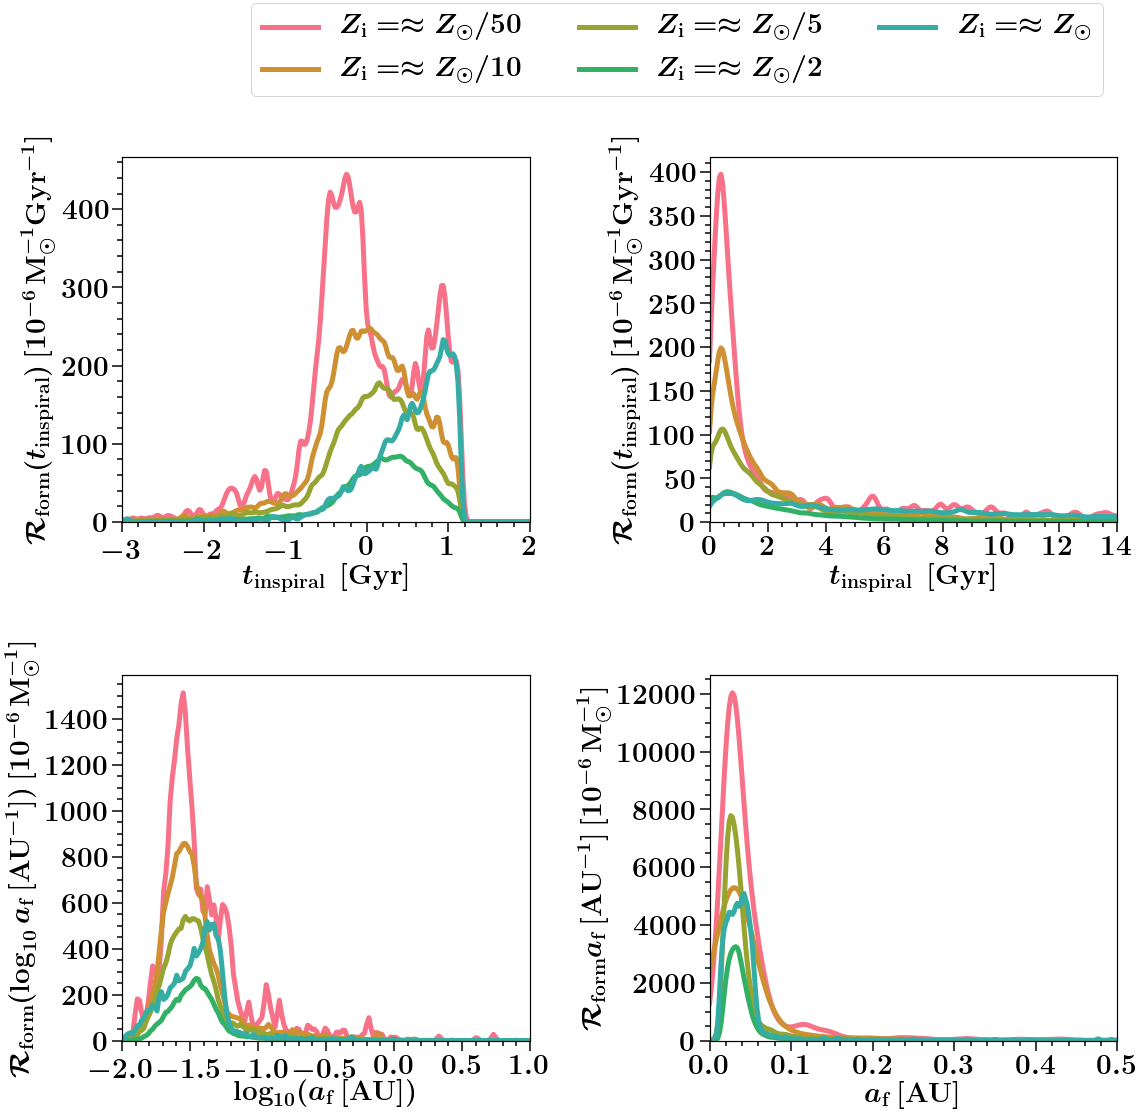

In [5]:

linewidth=3.5
ALPHA=0



mycolors       = sns.color_palette("husl", 8)


# print(mycolors)
f, ax= plt.subplots(ncols=2,nrows=2,figsize=(16,14), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2]})

fs=28

#general
Nbins= 'silverman' #.055 #.05#50 #.1 #50
indicesZ   = np.array([0, 4, 9, 14, 25])
ZOfInterest = Data.metallicityGrid[indicesZ]



ZOfInterest = np.asarray([0.00027, 0.0014, 0.00272, 0.00732, 0.01416 ])

####### BH MASS 
M1, M2 = Data.mass1, Data.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
xvar = MBH
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{BH}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'


n= len(M1)*5
d=1

Nbins=0.04

print('bandwidth kde =', Nbins)







# ######## INSPIRAL TIME
xvar = np.log10(Data.tc / 1000)
nameY = r'$\mathcal{R}_{\rm{form}}(t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameX = r' $t_{\rm{inspiral}}$ $ \,  [\rm{Gyr}]$'

_,_=plotmetallicitydistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-3,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-3,2], ylim=[0,3.6], indplot=5) 



# ######## INSPIRAL TIME
xvar = (Data.tc / 1000)
nameY = r'$\mathcal{R}_{\rm{form}}(t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameX = r' $t_{\rm{inspiral}}$ $ \,  [\rm{Gyr}]$'

_,_=plotmetallicitydistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,14],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[0,14], ylim=[0,3.6], indplot=0) 






# ######## INSPIRAL TIME
xvar = np.log10(Data.separationDCOFormation)

nameY = r'$ \mathcal{R}_{\rm{form}}(\log_{10} a_{\rm{f}}  \, [\rm{AU}^{-1}]) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $\log_{10}(a_{\rm{f}} \, [\rm{AU}] )$'

_,_=plotmetallicitydistribution(axe=ax[1,0], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-2,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,1], ylim=[0,30.6], indplot=0) 




# ######## INSPIRAL TIME
xvar = (Data.separationDCOFormation)
nameY = r'$ \mathcal{R}_{\rm{form}}a_{\rm{f}}  \, [\rm{AU}^{-1}] \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $a_{\rm{f}} \, [\rm{AU}] $'

_,_=plotmetallicitydistribution(axe=ax[1,1], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,0.5],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[0,0.5], ylim=[0,30.6], indplot=0) 



# # LEGEND
lgd = f.legend(handles, labels, fontsize=fs, ncol=3,\
         bbox_to_anchor=(0.97, 1.12),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.44, hspace=0.42)
plt.savefig('./supplementary_material/2_BHNSdistributions_vs_metallicity_notLOG.png', dpi=100, transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()






